In [22]:
# Install the dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [23]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving NFLX_1Y.csv to NFLX_1Y.csv


In [24]:
# Store the data into a data frame
df = pd.read_csv('NFLX_1Y.csv')
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-16,298.859985,303.549988,296.269989,302.799988,302.799988,6905800
1,2019-08-19,306.250000,311.750000,304.750000,309.380005,309.380005,4942200
2,2019-08-20,304.570007,305.000000,297.679993,298.989990,298.989990,7349900
3,2019-08-21,301.609985,302.880005,296.200012,297.809998,297.809998,5685400
4,2019-08-22,298.649994,300.329987,293.149994,296.929993,296.929993,4974200
5,2019-08-23,295.000000,299.010010,290.320007,291.440002,291.440002,6324900


In [25]:
# Get the number of trading days
df.shape

(252, 7)

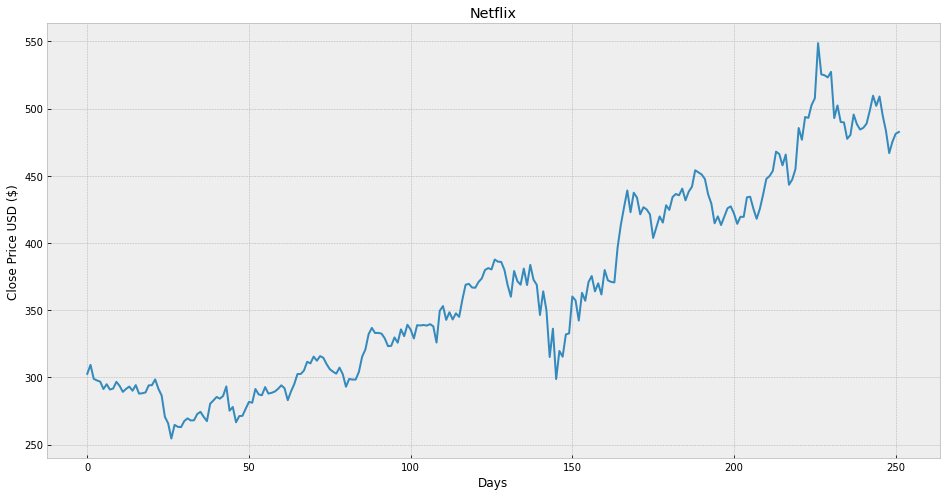

In [26]:
# Visualize the close price data
plt.figure(figsize=(16,8))
plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.show()

In [27]:
# Get the close price
df = df[['Close']]
df.head(4)

,Close
0,302.799988
1,309.380005
2,298.989990
3,297.809998


In [28]:
# Create a variable to predict 'x' days out into the future
future_days = 25
# Create a new column (target) shifted 'x' unit/days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(4)


,Close,Prediction
248,466.929993,NaN
249,475.470001,NaN
250,481.329987,NaN
251,482.679993,NaN


In [29]:
# Create the feature data set (X) and convert it to a numpy array and remove the last 'x' rows/days
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[302.799988]
 [309.380005]
 [298.98999 ]
 [297.809998]
 [296.929993]
 [291.440002]
 [294.980011]
 [291.029999]
 [291.769989]
 [296.779999]
 [293.75    ]
 [289.290009]
 [291.519989]
 [293.25    ]
 [290.170013]
 [294.339996]
 [287.98999 ]
 [288.269989]
 [288.859985]
 [294.149994]
 [294.290009]
 [298.600006]
 [291.559998]
 [286.600006]
 [270.75    ]
 [265.920013]
 [254.589996]
 [264.75    ]
 [263.309998]
 [263.079987]
 [267.619995]
 [269.579987]
 [268.029999]
 [268.149994]
 [272.790009]
 [274.459991]
 [270.720001]
 [267.529999]
 [280.480011]
 [282.929993]
 [285.529999]
 [284.25    ]
 [286.279999]
 [293.350006]
 [275.299988]
 [278.049988]
 [266.690002]
 [271.269989]
 [271.5     ]
 [276.820007]
 [281.859985]
 [281.209991]
 [291.450012]
 [287.410004]
 [286.809998]
 [292.859985]
 [288.029999]
 [288.589996]
 [289.570007]
 [291.570007]
 [294.179993]
 [292.01001 ]
 [283.109985]
 [289.619995]
 [295.029999]
 [302.570007]
 [302.600006]
 [305.160004]
 [311.690002]
 [310.480011]
 [315.549988]
 [312.

In [30]:
# Create the target dataset (y) and convert it to a numpy array and get all the target values except the last 'x' rows/ days
y = np.array(df['Prediction'])[:-future_days]
print(y)

[265.920013 254.589996 264.75     263.309998 263.079987 267.619995
 269.579987 268.029999 268.149994 272.790009 274.459991 270.720001
 267.529999 280.480011 282.929993 285.529999 284.25     286.279999
 293.350006 275.299988 278.049988 266.690002 271.269989 271.5
 276.820007 281.859985 281.209991 291.450012 287.410004 286.809998
 292.859985 288.029999 288.589996 289.570007 291.570007 294.179993
 292.01001  283.109985 289.619995 295.029999 302.570007 302.600006
 305.160004 311.690002 310.480011 315.549988 312.48999  315.929993
 314.660004 309.98999  306.160004 304.320007 302.859985 307.350006
 302.5      293.119995 298.929993 298.440002 298.5      304.209991
 315.480011 320.799988 332.220001 336.899994 333.100006 333.200012
 332.630005 329.089996 323.309998 323.570007 329.809998 325.899994
 335.829987 330.75     339.26001  335.660004 329.049988 338.920013
 338.690002 339.070007 338.619995 339.670013 338.109985 326.
 349.600006 353.160004 342.880005 348.519989 343.160004 347.73999
 345.08

In [31]:
# Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [32]:
# Create the models
# Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
# Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [33]:
# Get the last 'x' rows of the feature data set
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[419.600006],
       [419.48999 ],
       [434.049988],
       [434.480011],
       [425.559998],
       [418.070007],
       [425.5     ],
       [436.130005],
       [447.769989],
       [449.869995],
       [453.720001],
       [468.040009],
       [466.26001 ],
       [457.850006],
       [465.910004],
       [443.399994],
       [447.23999 ],
       [455.040009],
       [485.640015],
       [476.890015],
       [493.809998],
       [493.160004],
       [502.779999],
       [507.76001 ],
       [548.72998 ]])

In [34]:
# Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
# Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[525.5      524.880005 523.26001  425.559998 492.98999  524.880005
 492.98999  489.820007 477.579987 480.450012 495.649994 488.51001
 484.480011 485.799988 484.480011 436.130005 509.640015 502.109985
 509.079987 494.730011 483.380005 466.929993 481.329987 481.329987
 482.679993]

[440.40216609 440.29420339 454.5824587  455.0044559  446.25092289
 438.90072245 446.19204467 456.62365499 468.04639442 470.10720665
 473.88535749 487.93810189 486.19132417 477.93828153 485.84785056
 463.75795947 467.52628714 475.18072932 505.20962756 496.62293449
 513.22712887 512.58926613 522.02971692 526.91678275 567.12210362]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


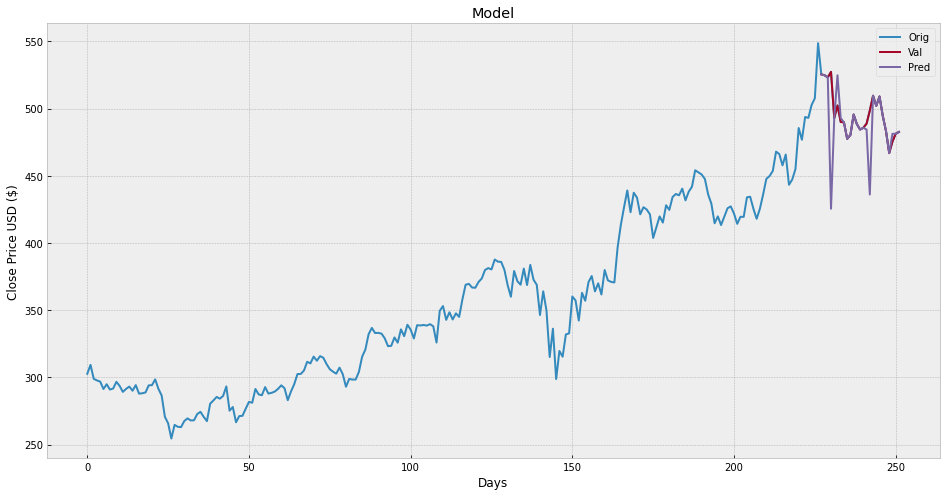

In [35]:
# Visualize the data
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


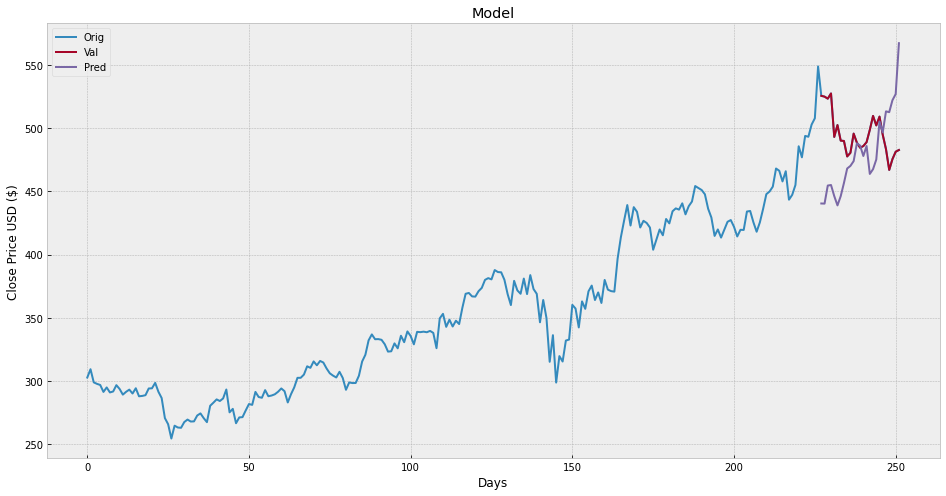

In [36]:
# Visualize the data
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()